# Preprocessing

(**Note:** *As this notebook required downloading additional modules, it has been done in a separate virtual envoirnment named augumentation. To run this notebook, please run 'conda activate augumentation' in konsole beforehand.*)

## Average image size check

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
#This cell will save each image's size (both dimentions) into two lists. 
dim1 = []
dim2 = []
for image_filename in os.listdir('SortedBirdsImages/backup images/images/'):
    name, ext = os.path.splitext(image_filename)
    try:
        if ext == '.jpg':     # as we have only jpg files, we will be reading only these.
            img = imread('SortedBirdsImages/backup images/images/'+image_filename)
            d1,d2,color = img.shape
            dim1.append(d1)
            dim2.append(d2)
            
    except: 
        print(image_filename)
        continue

In [ ]:
Dim=pd.DataFrame([],columns=['dim1','dim2']) # create a pandas data frame to store these dimentions.
Dim.dim1=dim1
Dim.dim2=dim2

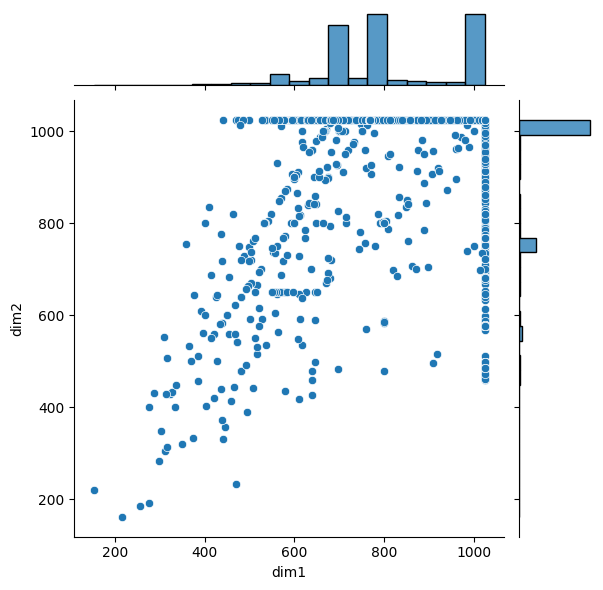

In [ ]:
sns.jointplot(data=Dim, x="dim1", y="dim2")    #Plot the dimetions to have a visualization.

In [ ]:
print('Dimentions stats:\n')
print('Mean Dimentions(',int(np.mean(dim1)),',',int(np.mean(dim2)),')')   #mean dimentions
print('Min Dimentions: (', np.min(dim1),',',np.min(dim2),')')             #min dimentions
print('Max Dimentions: (', np.max(dim1),',',np.max(dim2),')')             #max dimentions

Dimentions stats:

Mean Dimentions( 801 , 931 )
Min Dimentions: ( 153 , 162 )
Max Dimentions: ( 1024 , 1024 )


As we can see from the plot, most of the images have atleast on dimention as 1024, we should choose an architecture that support 1024x1024 sized images. Some good options are Faster RCNN ResNet 101 1024x1024 and SSD ReaNet 101 1024x1024. We can also change the remaining images by resizing them to this dimention, but that is not necessary at this stage, as these architectures are capable of doing this on their own.

## Labelling

For object detection using Tensorflow Object Detection API, we need to create labels for all the four types of birds and annotae the images. The labels will be stored in the form of XML files in Pascal VOC format. The key features of the XML files are the object name, image size (height, width, depth) and bounding box dimentions.These features will be used to create TF records in the training notebook.

There are a lot of modules available online to tag our images. The one used in this task is called LabelImg, recommended by the official tutorial of Object Detection API. It is an easy to use module and creates relatively clean XML files. The following command runs the executable file which allows to label the images.

In [ ]:
!python labelImg/labelImg.py        #Runs the LabelImg module

QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-msc1'


The XML file looks like this;

##### < annotation>
##### < folder>Erithacus_Rubecula< /folder>
##### < filename>ErithacusRubecula0004.jpg < /filename>
##### < path>images/ErithacusRubecula0004.jpg< /path>
##### < source>
##### < database>Unknown< /database>
##### < /source>
##### < size>
##### < width>1024< /width>
##### < height>1024< /height>
##### < depth>3< /depth>
##### < /size>
##### < segmented>0< /segmented>
##### < object>
##### < name>Erithacus_Rubecula< /name>
##### < pose>Unspecified< /pose>
##### < truncated>1< /truncated>
##### < difficult>0< /difficult>
##### < bndbox>
##### < xmin>257< /xmin>
##### < ymin>258< /ymin>
##### < xmax>1024< /xmax>
##### < ymax>1024< /ymax>
##### < /bndbox>
##### < /object>
##### < /annotation>